In [132]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [134]:
df = pd.read_csv('Google_Stock_Price_Train.csv')

In [136]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [137]:
#keras only takes numpy array
train_set = df.iloc[:, 1: 2].values

In [140]:
train_set.shape

(1258, 1)

In [141]:
sc = MinMaxScaler(feature_range=(0,1))
scaled_data = sc.fit_transform(train_set)

In [149]:
x_train=[]
y_train=[]
for i in range(60,len(scaled_data)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])

x_train, y_train = np.array(xtrain), np.array(ytrain)

In [153]:
x_train.shape

(1198, 60)

In [155]:
y_train.shape

(1198,)

In [159]:
x_train = np.reshape(x_train, newshape = (x_train.shape[0], x_train.shape[1],1))

In [163]:
x_train.shape

(1198, 60, 1)

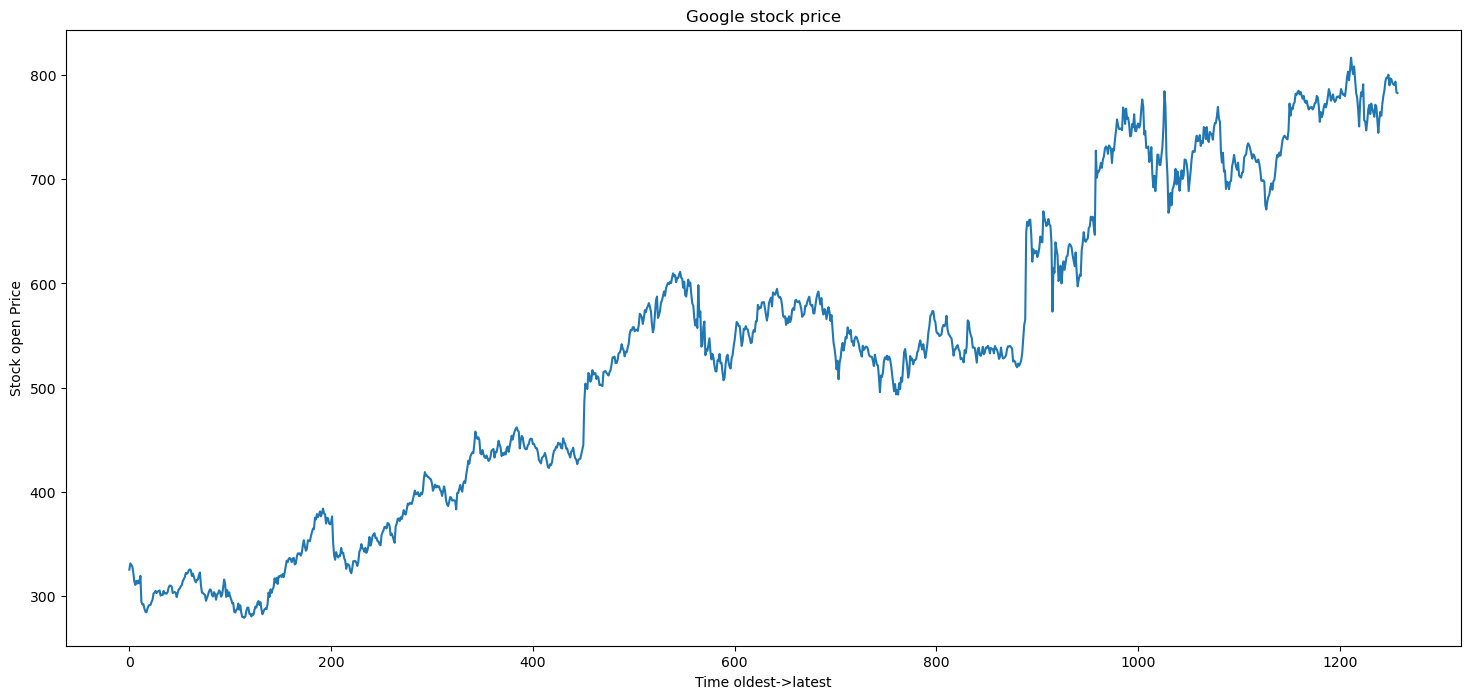

In [171]:
plt.figure(figsize = (18,8))
plt.plot(df['Open'])
plt.xlabel("Time oldest->latest")
plt.ylabel("Stock open Price")
plt.title("Google stock open price")
plt.show()

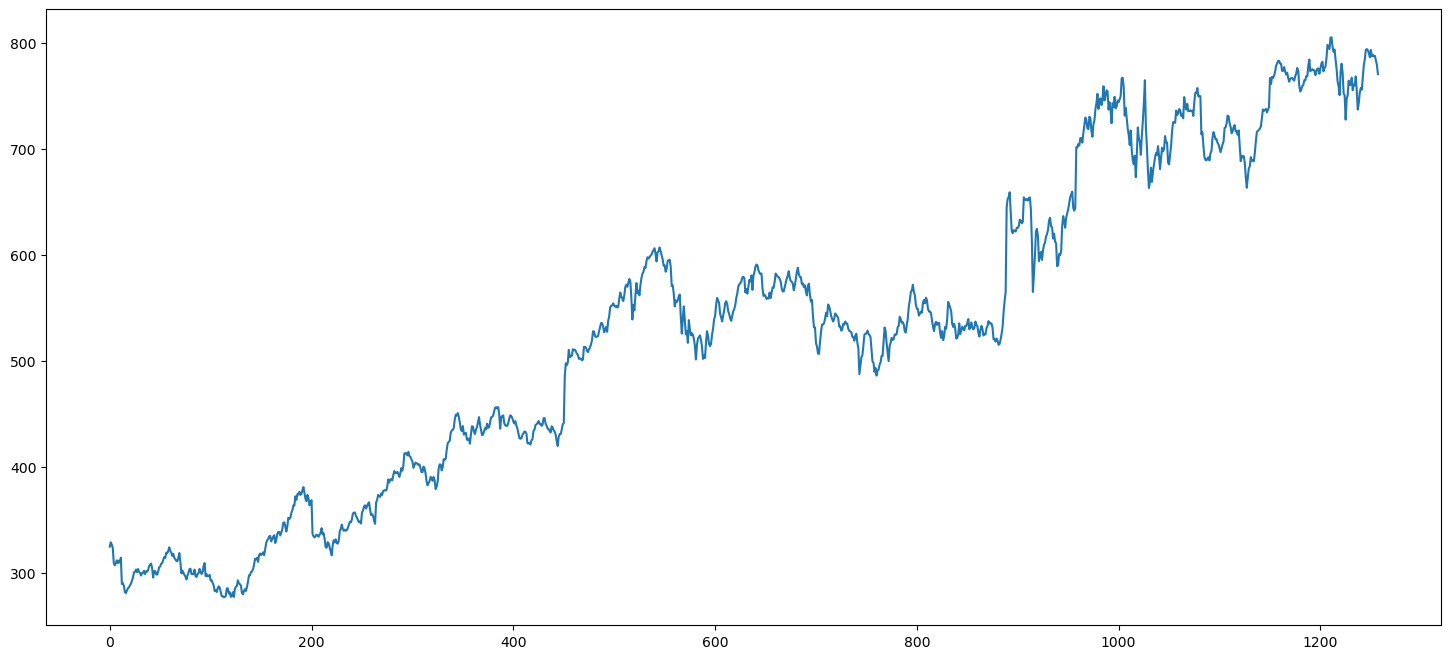

In [175]:
plt.figure(figsize=(18,8))
plt.plot(df['Low'])


In [179]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (xtrain.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate=0.2))

regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate=0.2))

regressor.add(Dense(units = 1))

C:\Users\heman\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [185]:
regressor.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [189]:
regressor.fit(x =x_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 89ms/step - loss: 0.0869
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.0064
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0056
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0059
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0052
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0049
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0045
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0042
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0041
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0042
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0043
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0039
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0037
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0040
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - l